In [1]:
#description
#  This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#  We are going to use this LSTM to predict the closing stock price of a corporation (Apple inc) using the past 60 day stock price.

In [2]:
#import libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#get the stock quote

In [4]:
df = web.DataReader('GME',data_source='yahoo',start='2021-01-15', end='2021-08-13')

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-15,40.750000,34.009998,38.490002,35.500000,46866400,35.500000
2021-01-19,45.520000,36.639999,41.549999,39.360001,74721900,39.360001
2021-01-20,41.189999,36.060001,37.369999,39.119999,33471800,39.119999
2021-01-21,44.750000,37.000000,39.230000,43.029999,56216900,43.029999
2021-01-22,76.760002,42.320000,42.590000,65.010002,197157900,65.010002
...,...,...,...,...,...,...
2021-08-09,164.710007,150.660004,151.800003,161.130005,2249200,161.130005
2021-08-10,166.899994,155.350006,161.360001,159.050003,1623300,159.050003
2021-08-11,159.050003,154.619995,158.429993,158.779999,945400,158.779999


In [6]:
#get the number of rows/columns
df.shape

(146, 6)

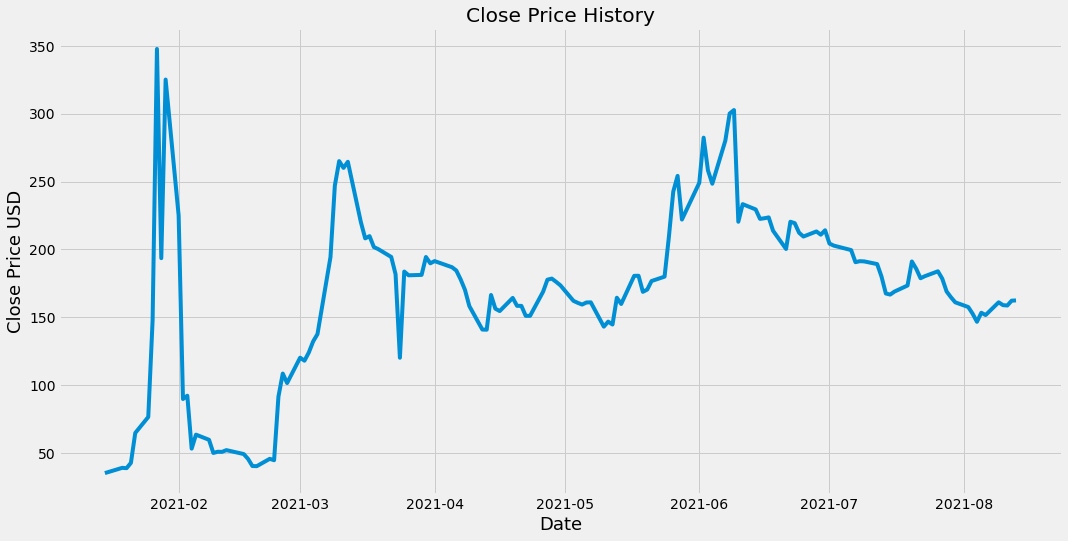

In [7]:
#visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [8]:
#create new df with only close column
data = df.filter(['Close'])
#convert df to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

117

In [9]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.0123714 ],
       [0.01160219],
       [0.02413384],
       [0.09458031],
       [0.1323355 ],
       [0.36050124],
       [1.        ],
       [0.50671453],
       [0.92785485],
       [0.60735231],
       [0.17467388],
       [0.18239801],
       [0.05769046],
       [0.09060607],
       [0.07852312],
       [0.04746643],
       [0.0503189 ],
       [0.04999839],
       [0.05416493],
       [0.0449024 ],
       [0.03346046],
       [0.01663408],
       [0.01631358],
       [0.03365277],
       [0.03035159],
       [0.18015447],
       [0.23470402],
       [0.21230087],
       [0.27210666],
       [0.2649915 ],
       [0.28422165],
       [0.31040673],
       [0.32768181],
       [0.50959904],
       [0.67754235],
       [0.73555332],
       [0.7195282 ],
       [0.73395081],
       [0.59177588],
       [0.55341173],
       [0.55866797],
       [0.53283547],
       [0.52809205],
       [0.509567  ],
       [0.46873496],
       [0.27191434],
       [0.475

In [10]:
#create the training data set
#create the scaled training set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
#independent variable
x_train = []
#dependent variable
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.0123714 , 0.01160219, 0.02413384, 0.09458031,
       0.1323355 , 0.36050124, 1.        , 0.50671453, 0.92785485,
       0.60735231, 0.17467388, 0.18239801, 0.05769046, 0.09060607,
       0.07852312, 0.04746643, 0.0503189 , 0.04999839, 0.05416493,
       0.0449024 , 0.03346046, 0.01663408, 0.01631358, 0.03365277,
       0.03035159, 0.18015447, 0.23470402, 0.21230087, 0.27210666,
       0.2649915 , 0.28422165, 0.31040673, 0.32768181, 0.50959904,
       0.67754235, 0.73555332, 0.7195282 , 0.73395081, 0.59177588,
       0.55341173, 0.55866797, 0.53283547, 0.52809205, 0.509567  ,
       0.46873496, 0.27191434, 0.47514501, 0.46633119, 0.46729271,
       0.50947086, 0.49459954, 0.4998237 , 0.48540108, 0.47754878,
       0.45661997, 0.4319092 , 0.39376942, 0.33841862, 0.33809814])]
[0.41995447158161275]



In [11]:
#convert the training data to a numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train.shape

(57, 60)

In [13]:
#reshape the dataset
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(57, 60, 1)

In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
          

In [15]:
#compile the model
model.compile(optimizer="adam",loss='mean_squared_error')

In [16]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

57/57 [==============================] - 10s 42ms/step - loss: 0.0430


In [17]:
#create the testing data set
#create a new array containing scaled values from index 1543
test_data = scaled_data[training_data_len - 60:,:]

#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [18]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
#get the models prediced price values
predictions = model.predict(x_test)
#unscaling the values
predictions = scaler.inverse_transform(predictions)

In [21]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))

In [22]:
rmse

27.870915458860576

<ipython-input-23-0f597c409cdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


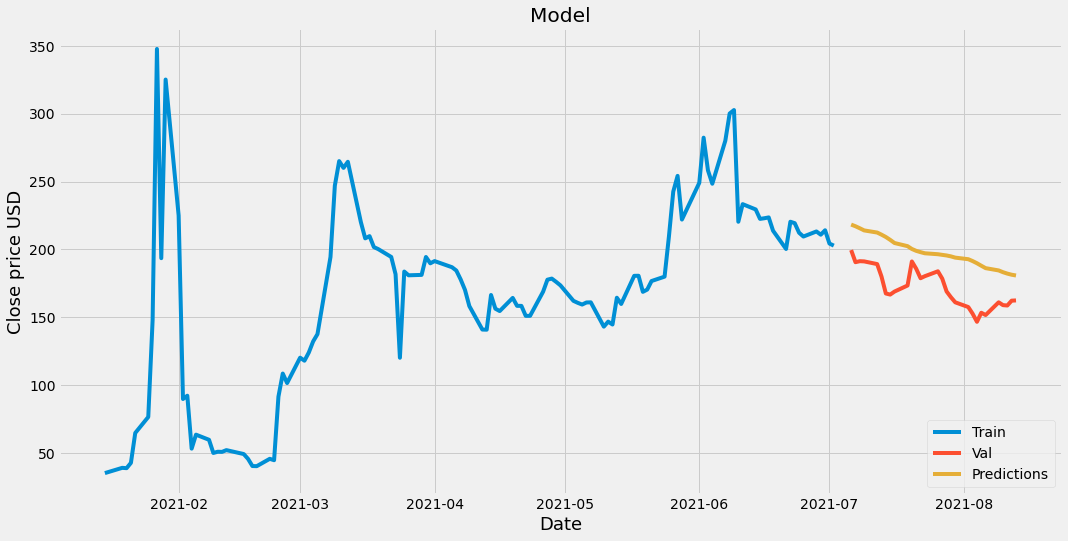

In [23]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [24]:
#Show the valid and predicted prices
valid 

,Close,predictions
Date,,
2021-07-06,199.559998,218.320496
2021-07-07,190.660004,217.072739
2021-07-08,191.380005,215.592712
2021-07-09,191.229996,214.021530
2021-07-12,189.250000,212.451462
2021-07-13,180.059998,210.895050
2021-07-14,167.619995,209.170120
2021-07-15,166.820007,207.063889
2021-07-16,169.039993,204.747620


In [25]:
#get the quote
gme_quote = web.DataReader('GME',data_source='yahoo',start='2021-01-15', end='2021-08-13')
#create a df
new_df = gme_quote.filter(['Close'])
#convert last 60 days to array
last_60_days = new_df[-60:].values
#scale the data, we don't use .fit here because it uses the same .fit from earlier?
last_60_days_scaled = scaler.transform(last_60_days)
#create empty list
X_test = []
#append past 60 days to the list
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[180.51317]]


In [26]:
gme_quote2 = web.DataReader('GME',data_source='yahoo',start='2021-08-13', end='2021-08-13')
print(gme_quote2['Close'])

Date
2021-08-13    162.520004
2021-08-13    162.520004
Name: Close, dtype: float64
